In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the card game environment (simplified)
class CardGameEnvironment:
    def __init__(self):
        self.state_space_size = 10  # Number of possible states
        self.action_space_size = 4  # Number of possible actions (playing different cards)
        self.transition_probabilities = np.random.rand(self.state_space_size, self.action_space_size, self.state_space_size)
        self.transition_probabilities /= np.sum(self.transition_probabilities, axis=2, keepdims=True)  # Normalize probabilities
        self.rewards = np.random.randint(-5, 5, size=(self.state_space_size, self.action_space_size))

    def step(self, state, action):
        next_state_probabilities = self.transition_probabilities[state, action, :]
        next_state = np.random.choice(self.state_space_size, p=next_state_probabilities)
        reward = self.rewards[state, action]
        return next_state, reward

In [4]:
# SARSA algorithm
def sarsa(env, num_episodes, alpha, epsilon, gamma):
    q_values = np.zeros((env.state_space_size, env.action_space_size))
    rewards_list = []

    for episode in range(num_episodes):
        state = np.random.randint(env.state_space_size)
        action = np.random.randint(env.action_space_size)

        episode_rewards = 0

        while True:
            next_state, reward = env.step(state, action)
            next_action = epsilon_greedy_policy(q_values[next_state, :], epsilon)

            q_values[state, action] += alpha * (reward + gamma * q_values[next_state, next_action] - q_values[state, action])

            episode_rewards += reward

            if next_state == env.state_space_size - 1:  # Terminal state reached
                break

            state = next_state
            action = next_action

        rewards_list.append(episode_rewards)

    return rewards_list

In [5]:
# Expected SARSA algorithm
def expected_sarsa(env, num_episodes, alpha, epsilon, gamma):
    q_values = np.zeros((env.state_space_size, env.action_space_size))
    rewards_list = []

    for episode in range(num_episodes):
        state = np.random.randint(env.state_space_size)
        action = np.random.randint(env.action_space_size)

        episode_rewards = 0

        while True:
            next_state, reward = env.step(state, action)
            next_action = epsilon_greedy_policy(q_values[next_state, :], epsilon)

            expected_q_value = np.sum(env.transition_probabilities[next_state, next_action, :] * q_values[next_state, :][:, None])

            q_values[state, action] += alpha * (reward + gamma * expected_q_value - q_values[state, action])

            episode_rewards += reward

            if next_state == env.state_space_size - 1:  # Terminal state reached
                break

            state = next_state
            action = next_action

        rewards_list.append(episode_rewards)

    return rewards_list
# Epsilon-greedy policy
def epsilon_greedy_policy(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_values))
    else:
        return np.argmax(q_values)

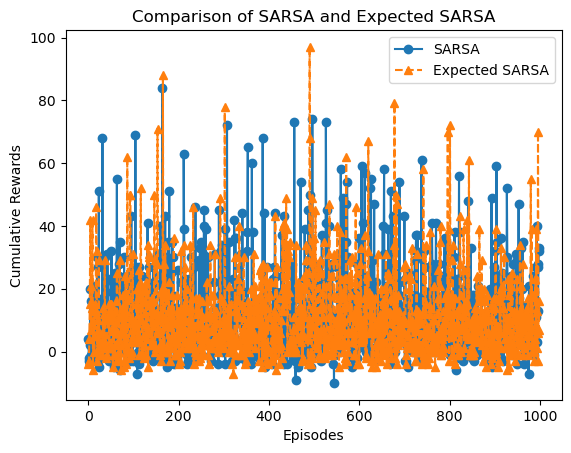

In [7]:
def main():
    env = CardGameEnvironment()

    num_episodes = 1000
    alpha = 0.1
    epsilon = 0.1
    gamma = 0.99

    sarasa_rewards = sarsa(env, num_episodes, alpha, epsilon, gamma)
    expected_sarsa_rewards = expected_sarsa(env, num_episodes, alpha, epsilon, gamma)

    plt.plot(sarasa_rewards, label='SARSA', linestyle='-', marker='o')
    plt.plot(expected_sarsa_rewards, label='Expected SARSA', linestyle='--', marker='^')
    
    plt.title('Comparison of SARSA and Expected SARSA')
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Rewards')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5044\2710583428.py:18: RuntimeWarning: invalid value encountered in scalar subtract
  q_values[state, action] += alpha * (reward + gamma * expected_q_value - q_values[state, action])
C:\Users\DELL\AppData\Local\Temp\ipykernel_5044\2710583428.py:18: RuntimeWarning: invalid value encountered in scalar add
  q_values[state, action] += alpha * (reward + gamma * expected_q_value - q_values[state, action])


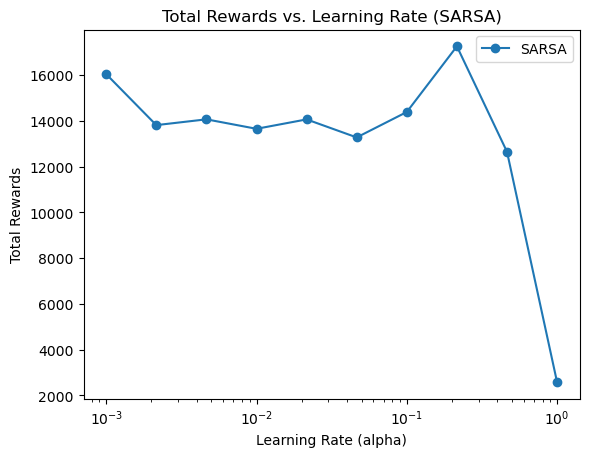

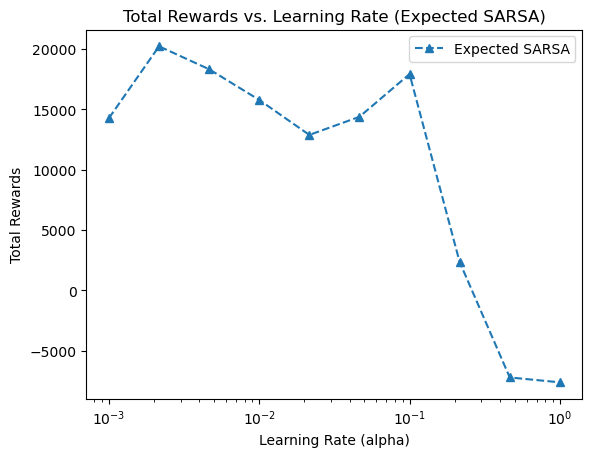

In [11]:
def main():
    env = CardGameEnvironment()

    num_episodes = 1000
    epsilon = 0.1
    gamma = 0.99

    alpha_values = np.logspace(-3, 0, num=10)  # Generate logarithmically spaced alpha values between 0.001 and 1
    sarasa_total_rewards = []
    expected_sarsa_total_rewards = []

    for alpha in alpha_values:
        sarasa_rewards = sarsa(env, num_episodes, alpha, epsilon, gamma)
        expected_sarsa_rewards = expected_sarsa(env, num_episodes, alpha, epsilon, gamma)

        sarasa_total_rewards.append(np.sum(sarasa_rewards))
        expected_sarsa_total_rewards.append(np.sum(expected_sarsa_rewards))

    # Plot SARSA total rewards
    plt.plot(alpha_values, sarasa_total_rewards, label='SARSA', linestyle='-', marker='o')
    plt.title('Total Rewards vs. Learning Rate (SARSA)')
    plt.xlabel('Learning Rate (alpha)')
    plt.ylabel('Total Rewards')
    plt.xscale('log')
    plt.legend()
    plt.show()

    # Plot Expected SARSA total rewards
    plt.plot(alpha_values, expected_sarsa_total_rewards, label='Expected SARSA', linestyle='--', marker='^')
    plt.title('Total Rewards vs. Learning Rate (Expected SARSA)')
    plt.xlabel('Learning Rate (alpha)')
    plt.ylabel('Total Rewards')
    plt.xscale('log')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
